In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore') #чтобы не было красных ошибок

from category_encoders import TargetEncoder

# df_train

In [132]:
path = '~/DS/DataSets/datasets-20211027T062706Z-001/datasets/house_prices/my-house-prices-kaggle/train.csv'

df_train_init = pd.read_csv(path)
df_train =  df_train_init.copy()

# pd.set_option('display.max_columns', 15) #выводим все столбцы
# pd.set_option('display.max_rows', 15) #выводим все строки

df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## shape, dtypes

In [133]:
df_train.shape

(1460, 81)

In [134]:
df_train_columns = df_train.columns.to_list()
df_train_columns

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [135]:
# df_train.dtypes
# df_train.select_dtypes(include=['object'])
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [136]:
train_obj_col = list(df_train.select_dtypes(include=['object']))
train_numeric = list(df_train.select_dtypes(exclude=['object']))


## удаляем Utilities

In [137]:
df_train.drop(['Utilities'], axis=1, inplace=True)

In [138]:
df_train.shape

(1460, 80)

#  df_test

In [139]:
path = '~/DS/DataSets/datasets-20211027T062706Z-001/datasets/house_prices/my-house-prices-kaggle/test.csv'
df_test_init = pd.read_csv(path)
df_test = df_test_init.copy()

df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## shape, dtypes

In [140]:
df_test.shape

(1459, 80)

In [141]:
# df_test.dtypes
# df_test.select_dtypes(include=['object'])
df_test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [142]:
test_obj_col = df_test.select_dtypes(include=['object'])

test_obj_col.columns.to_list()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## удаляем Utilities

In [143]:
df_test.drop(['Utilities'], axis=1, inplace=True)

In [144]:
df_test.shape

(1459, 79)

## добавляем y из старого predict-a

In [145]:
path = '~/DS/DataSets/datasets-20211027T062706Z-001/datasets/house_prices/my-house-prices-kaggle/sample_submission - 12.11.21.csv'
result_121121 = pd.read_csv(path)
# df_test = df_test_init.copy()

result_121121

,Id,SalePrice
0,1461,123062.712934
1,1462,159036.668657
2,1463,179092.485003
3,1464,189112.941800
4,1465,188545.380623
...,...,...
1454,2915,79289.081911
1455,2916,78344.757050
1456,2917,160219.533248
1457,2918,122253.504632


In [146]:
df_test_with_y = df_test.copy()

In [147]:
df_test_with_y['SalePrice'] = result_121121['SalePrice']
df_test_with_y.shape

(1459, 80)

In [148]:
df_test_with_y

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,123062.712934
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,159036.668657
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,179092.485003
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189112.941800
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,188545.380623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,79289.081911
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,78344.757050
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,160219.533248
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,122253.504632


# sns.heatmap - корреляции

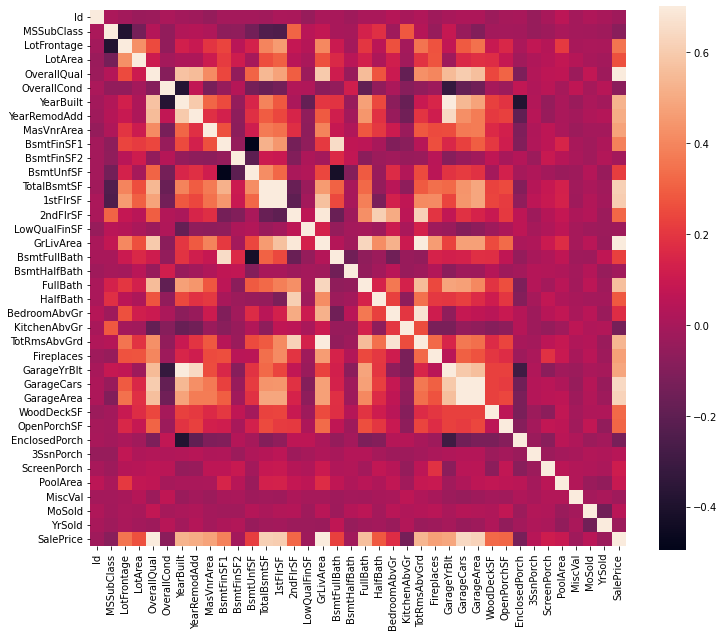

In [149]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax=0.7, square=True);

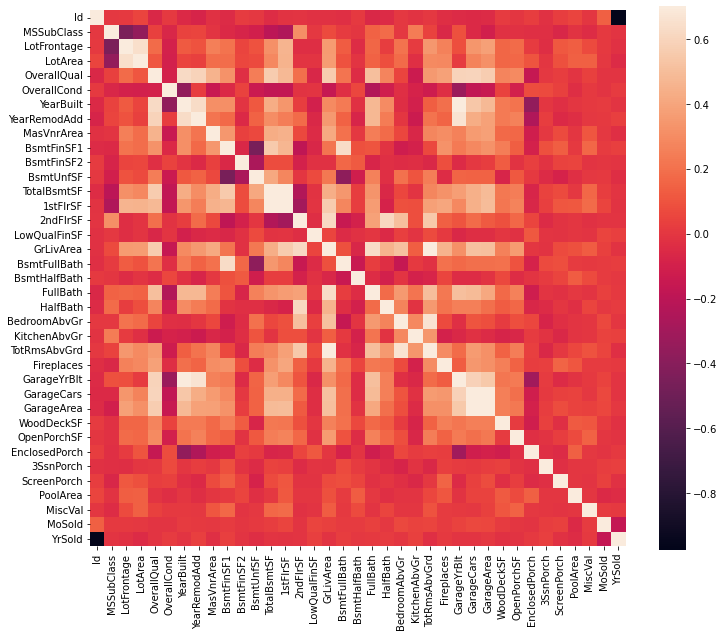

In [150]:
corrmat = df_test.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax=0.7, square=True);

# df_all

In [151]:
df_all = pd.concat([df_train, df_test_with_y], sort=True).reset_index(drop=True)
# df_train: 1460 rows × 80 columns 
# df_test: 1459 rows × 79 columns 
# df_test_with_y: 1459 rows × 80 columns
# df_all: 2919 rows × 80 columns 

df_all

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,208500.000000,WD,0,Pave,8,856.0,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,181500.000000,WD,0,Pave,6,1262.0,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,223500.000000,WD,0,Pave,6,920.0,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,140000.000000,WD,0,Pave,7,756.0,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,250000.000000,WD,0,Pave,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,79289.081911,WD,0,Pave,5,546.0,0,1970,1970,2006
2915,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,78344.757050,WD,0,Pave,6,546.0,0,1970,1970,2006
2916,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,160219.533248,WD,0,Pave,7,1224.0,474,1960,1996,2006
2917,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,122253.504632,WD,0,Pave,6,912.0,80,1992,1992,2006


In [152]:
df_all['SalePrice']

0       208500.000000
1       181500.000000
2       223500.000000
3       140000.000000
4       250000.000000
            ...      
2914     79289.081911
2915     78344.757050
2916    160219.533248
2917    122253.504632
2918    223694.344834
Name: SalePrice, Length: 2919, dtype: float64

## выбросы df_all - удаляем

In [153]:
outliars = df_all[(df_all['SalePrice']>100000) & (df_all['GrLivArea']>4600)]
outliars

#2549 - ЭТО TEST, а не train!!!!!!!!!

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
523,3138,1538,0,NaN,3,1Fam,TA,Gd,2260.0,0.0,...,184750.000000,New,0,Pave,11,3138.0,208,2007,2008,2007
1298,4692,950,0,NaN,3,1Fam,TA,Gd,5644.0,0.0,...,160000.000000,New,0,Pave,12,6110.0,214,2008,2008,2008
2549,5095,0,0,NaN,2,1Fam,TA,Gd,4010.0,0.0,...,309687.886538,New,0,Pave,15,5095.0,546,2008,2009,2007


Text(0, 0.5, 'Жилая площадь')

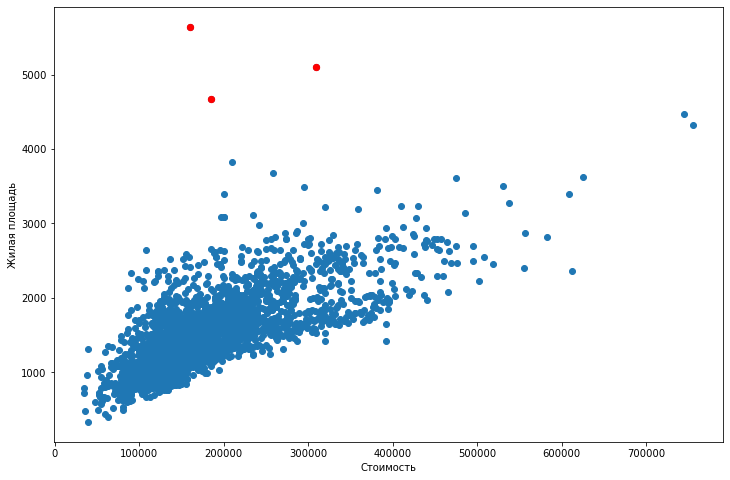

In [154]:
fig = plt.figure(figsize=(12, 8))

plt.scatter(df_all['SalePrice'], df_all['GrLivArea'])
plt.scatter(outliars['SalePrice'], outliars['GrLivArea'], color='r', s=40)


plt.xlabel('Стоимость')
plt.ylabel('Жилая площадь')

In [155]:
df_all = df_all.drop(df_all[(df_all['SalePrice']<300000) & (df_all['GrLivArea']>4600)].index) #удаляем 2, а не 3
df_all.index = range(1, 2918)
df_all

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,208500.000000,WD,0,Pave,8,856.0,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,181500.000000,WD,0,Pave,6,1262.0,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,223500.000000,WD,0,Pave,6,920.0,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,140000.000000,WD,0,Pave,7,756.0,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,250000.000000,WD,0,Pave,9,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,79289.081911,WD,0,Pave,5,546.0,0,1970,1970,2006
2914,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,78344.757050,WD,0,Pave,6,546.0,0,1970,1970,2006
2915,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,160219.533248,WD,0,Pave,7,1224.0,474,1960,1996,2006
2916,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,122253.504632,WD,0,Pave,6,912.0,80,1992,1992,2006


# Сколько пропусков?

In [156]:
df_train.name = 'Training Set' #1460 rows × 80 columns
df_test.name = 'Test Set'      #1459 rows × 79 columns
df_all.name = 'All Set'        #2916 rows × 80 columns
dfs = [df_train, df_test]
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} Количество пропущенных значений: {}'.format(col, df[col].isnull().sum(), df[col].dtypes))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
Id Количество пропущенных значений: 0
MSSubClass Количество пропущенных значений: 0
MSZoning Количество пропущенных значений: 0
LotFrontage Количество пропущенных значений: 259
LotArea Количество пропущенных значений: 0
Street Количество пропущенных значений: 0
Alley Количество пропущенных значений: 1369
LotShape Количество пропущенных значений: 0
LandContour Количество пропущенных значений: 0
LotConfig Количество пропущенных значений: 0
LandSlope Количество пропущенных значений: 0
Neighborhood Количество пропущенных значений: 0
Condition1 Количество пропущенных значений: 0
Condition2 Количество пропущенных значений: 0
BldgType Количество пропущенных значений: 0
HouseStyle Количество пропущенных значений: 0
OverallQual Количество пропущенных значений: 0
OverallCond Количество пропущенных значений: 0
YearBuilt Количество пропущенных значений: 0
YearRemodAdd Количество пропущенных значений: 0
RoofStyle Количество пропущенных значений: 0
RoofMatl Количество пропущенных значен

In [157]:
percent_missing_train = df_train.isnull().sum() * 100 / len(df_train)
percent_missing_train[percent_missing_train >5] #пропущенные в train >5%

LotFrontage     17.739726
Alley           93.767123
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [158]:
percent_missing_test = df_test.isnull().sum() * 100 / len(df_test)
percent_missing_test[percent_missing_test >5] #пропущенные в test >5%

LotFrontage     15.558602
Alley           92.666210
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
dtype: float64

In [159]:
percent_missing_train[percent_missing_train >0] #пропущенные в train >0%

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [160]:
percent_missing_test[percent_missing_test >0] #кол-во пропущенных в test >0%

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

In [161]:
len(percent_missing_train[percent_missing_train >0]) #кол-во пропущенных в train >0%

19

In [162]:
len(percent_missing_test[percent_missing_test >0]) #кол-во пропущенных в test >0%

32

# вместо года - возраст дома

## для train

In [163]:
df_train[df_train['YearBuilt']==0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [164]:
df_train['YearBuilt']

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [165]:
df_train['House_age'] = 2017 - df_train['YearBuilt']
df_train['House_age']

0        14
1        41
2        16
3       102
4        17
       ... 
1455     18
1456     39
1457     76
1458     67
1459     52
Name: House_age, Length: 1460, dtype: int64

In [166]:
df_train.drop(['YearBuilt'], axis=1, inplace=True)

In [167]:
df_train.shape

(1460, 80)

## для test

In [168]:
df_test[df_test['YearBuilt']=='Na']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [169]:
df_test['House_age'] = 2017 - df_test['YearBuilt']
df_test.drop(['YearBuilt'], axis=1, inplace=True)
df_test.shape

(1459, 79)

## для df_all

In [170]:
df_all['House_age'] = 2017 - df_all['YearBuilt']
df_all.drop(['YearBuilt'], axis=1, inplace=True)
df_all.shape

(2917, 80)

# Заполняем пропущенные -> df_all_2

## числовые - медианой, категориальные - словом 'dummie'

In [171]:
# df_train.dtypes
# df_train.select_dtypes(include=['object'])
df_all.dtypes.value_counts()

object     42
int64      26
float64    12
dtype: int64

In [172]:
df_all_obj_col = list(df_all.select_dtypes(include=['object'])) #все колонки с type=object
df_all_numeric = list(df_all.select_dtypes(exclude=['object'])) #все колонки с type=int64&float64

In [173]:
# df_all_obj_col_missing = list(df_all.select_dtypes(include=['object']).isnull()) #все колонки с type=object и пропусками
# df_all_numeric_col_missing = list(df_all.select_dtypes(exclude=['object']).isnull()) #все колонки с type=int64&float64 и пропусками

In [174]:
df_all_2 = df_all.copy()
# незаполненные числовые колонки заполняем медианой, категориальные - словом 'dummie' :)
df_all_2[df_all_numeric] = df_all_2[df_all_numeric].fillna(df_all_2[df_all_numeric].median()[0])
df_all_2[df_all_obj_col] = df_all_2[df_all_obj_col].fillna('dummie'[0])
df_all_2

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,YrSold,House_age
1,856,854,0,d,3,1Fam,TA,No,706.0,0.0,...,208500.000000,WD,0,Pave,8,856.0,0,2003,2008,14
2,1262,0,0,d,3,1Fam,TA,Gd,978.0,0.0,...,181500.000000,WD,0,Pave,6,1262.0,298,1976,2007,41
3,920,866,0,d,3,1Fam,TA,Mn,486.0,0.0,...,223500.000000,WD,0,Pave,6,920.0,0,2002,2008,16
4,961,756,0,d,3,1Fam,Gd,No,216.0,0.0,...,140000.000000,WD,0,Pave,7,756.0,0,1970,2006,102
5,1145,1053,0,d,4,1Fam,TA,Av,655.0,0.0,...,250000.000000,WD,0,Pave,9,1145.0,192,2000,2008,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,546,546,0,d,3,Twnhs,TA,No,0.0,0.0,...,79289.081911,WD,0,Pave,5,546.0,0,1970,2006,47
2914,546,546,0,d,3,TwnhsE,TA,No,252.0,0.0,...,78344.757050,WD,0,Pave,6,546.0,0,1970,2006,47
2915,1224,0,0,d,4,1Fam,TA,No,1224.0,0.0,...,160219.533248,WD,0,Pave,7,1224.0,474,1996,2006,57
2916,970,0,0,d,3,1Fam,TA,Av,337.0,0.0,...,122253.504632,WD,0,Pave,6,912.0,80,1992,2006,25


In [175]:
percent_missing_all_2 = df_all_2.isnull().sum() * 100 / len(df_all_2) #isnull ищет все пропущенные значения (и NaN)
len(percent_missing_all_2[percent_missing_all_2 >0])    # нет пропущенных!

0

## все категориальные 'dummie' - target_encoder

In [176]:
for col in df_all_obj_col:
    encoder = TargetEncoder()
    df_all_2[col] = encoder.fit_transform(df_all_2[col], df_all_2['SalePrice'])

df_all_2

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,YrSold,House_age
1,856,854,0,182920.646281,3,184004.116231,183290.261968,163891.134951,706.0,0.0,...,208500.000000,173614.199582,0,180541.538322,8,856.0,0,2003,2008,14
2,1262,0,0,182920.646281,3,184004.116231,183290.261968,268936.854379,978.0,0.0,...,181500.000000,173614.199582,0,180541.538322,6,1262.0,298,1976,2007,41
3,920,866,0,182920.646281,3,184004.116231,183290.261968,188679.928807,486.0,0.0,...,223500.000000,173614.199582,0,180541.538322,6,920.0,0,2002,2008,16
4,961,756,0,182920.646281,3,184004.116231,212649.204116,163891.134951,216.0,0.0,...,140000.000000,173614.199582,0,180541.538322,7,756.0,0,1970,2006,102
5,1145,1053,0,182920.646281,4,184004.116231,183290.261968,205057.764388,655.0,0.0,...,250000.000000,173614.199582,0,180541.538322,9,1145.0,192,2000,2008,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,546,546,0,182920.646281,3,134709.998092,183290.261968,163891.134951,0.0,0.0,...,79289.081911,173614.199582,0,180541.538322,5,546.0,0,1970,2006,47
2914,546,546,0,182920.646281,3,192370.432905,183290.261968,163891.134951,252.0,0.0,...,78344.757050,173614.199582,0,180541.538322,6,546.0,0,1970,2006,47
2915,1224,0,0,182920.646281,4,184004.116231,183290.261968,163891.134951,1224.0,0.0,...,160219.533248,173614.199582,0,180541.538322,7,1224.0,474,1996,2006,57
2916,970,0,0,182920.646281,3,184004.116231,183290.261968,205057.764388,337.0,0.0,...,122253.504632,173614.199582,0,180541.538322,6,912.0,80,1992,2006,25


In [177]:
obj_col = list(df_all_2.select_dtypes(include=['object']))
obj_col 

[]

## размеры data_frame-ов

In [178]:
# df_train: 1460-2 = 1458 rows × 80 columns - с 0 по 1457 (т.к. удалили 2 строки в 4.1)
# df_test: 1459 rows × 79 columns  - с 0 по 1458 --- c 1458 по 2917
# df_test_with_y: 1459 rows × 80 columns
# df_all: 2917 rows × 80 columns
# df_all_2: 2917 rows × 80 columns

# df_all_obj_col = list(df_all.select_dtypes(include=['object'])) #все колонки с type=object
# df_all_numeric = list(df_all.select_dtypes(exclude=['object'])) #все колонки с type=int64&float64

# df_all_2_obj_col = list(df_all_2.select_dtypes(include=['object'])) #все колонки с type=object
# df_all_2_numeric = list(df_all_2.select_dtypes(exclude=['object'])) #все колонки с type=int64&float64

df_all_2

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,YrSold,House_age
1,856,854,0,182920.646281,3,184004.116231,183290.261968,163891.134951,706.0,0.0,...,208500.000000,173614.199582,0,180541.538322,8,856.0,0,2003,2008,14
2,1262,0,0,182920.646281,3,184004.116231,183290.261968,268936.854379,978.0,0.0,...,181500.000000,173614.199582,0,180541.538322,6,1262.0,298,1976,2007,41
3,920,866,0,182920.646281,3,184004.116231,183290.261968,188679.928807,486.0,0.0,...,223500.000000,173614.199582,0,180541.538322,6,920.0,0,2002,2008,16
4,961,756,0,182920.646281,3,184004.116231,212649.204116,163891.134951,216.0,0.0,...,140000.000000,173614.199582,0,180541.538322,7,756.0,0,1970,2006,102
5,1145,1053,0,182920.646281,4,184004.116231,183290.261968,205057.764388,655.0,0.0,...,250000.000000,173614.199582,0,180541.538322,9,1145.0,192,2000,2008,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,546,546,0,182920.646281,3,134709.998092,183290.261968,163891.134951,0.0,0.0,...,79289.081911,173614.199582,0,180541.538322,5,546.0,0,1970,2006,47
2914,546,546,0,182920.646281,3,192370.432905,183290.261968,163891.134951,252.0,0.0,...,78344.757050,173614.199582,0,180541.538322,6,546.0,0,1970,2006,47
2915,1224,0,0,182920.646281,4,184004.116231,183290.261968,163891.134951,1224.0,0.0,...,160219.533248,173614.199582,0,180541.538322,7,1224.0,474,1996,2006,57
2916,970,0,0,182920.646281,3,184004.116231,183290.261968,205057.764388,337.0,0.0,...,122253.504632,173614.199582,0,180541.538322,6,912.0,80,1992,2006,25


# Логарифмируем

(array([  6.,   1.,  13.,  12.,  12.,  17.,  56.,  50.,  55.,  75., 107.,
        137., 170., 188., 203., 164., 142., 104., 126., 129., 126., 106.,
         82.,  65.,  67.,  68.,  58.,  59.,  51.,  37.,  36.,  35.,  27.,
         32.,  25.,  22.,  15.,  18.,  20.,  22.,  18.,  17.,  15.,   9.,
          9.,   9.,   8.,   9.,  10.,  10.,   8.,   4.,   4.,   3.,   6.,
          4.,   4.,   4.,   3.,   5.,   1.,   3.,   1.,   2.,   1.,   1.,
          0.,   1.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.]),
 array([ 34853.43376516,  42054.8994275 ,  49256.36508985,  56457.8307522 ,
         63659.29641455,  70860.7620769 ,  78062.22773925,  85263.6934016 ,
         92465.15906394,  99666.62472629, 106868.09038864, 114069.55605099,
        121271.02171334, 128472.48737569, 135673.95303803, 142875.41870038,
        150076

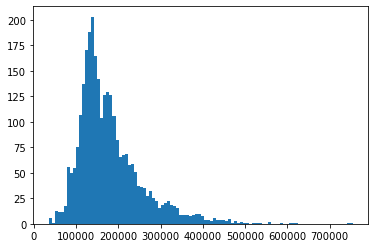

In [179]:
plt.hist(df_all_2['SalePrice'], bins=100)

In [180]:
from scipy.stats import skew 

skew_col = df_all_2[df_all_numeric].apply(lambda x: skew(x))
skew_col.sort_values(ascending=False)

skew_col = skew_col[abs(skew_col) > 0.5]

skew_features = df_all_2[skew_col.index] #все numeric ячейки с skew_col) > 0.5
# skew_features.columns
df_all_2[skew_features.columns] = np.log1p(df_all_2[skew_features.columns]) # логарифмируем все skew_col, и SalePrice
df_all_2[skew_features.columns]

# df_all_2['SalePrice'] = np.log1p(df_all_2['SalePrice']) # логарифмируем SalePrice

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,MiscVal,OpenPorchSF,OverallCond,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,House_age
1,6.753438,6.751101,0.0,6.561031,0.0,0.693147,0.000000,5.017280,0.000000,0.000000,...,0.000000,4.127134,1.791759,0.0,12.247699,0.0,2.197225,6.753438,0.000000,2.708050
2,7.141245,0.000000,0.0,6.886532,0.0,0.000000,0.693147,5.652489,0.000000,0.693147,...,0.000000,0.000000,2.197225,0.0,12.109016,0.0,1.945910,7.141245,5.700444,3.737670
3,6.825460,6.765039,0.0,6.188264,0.0,0.693147,0.000000,6.075346,0.000000,0.693147,...,0.000000,3.761200,1.791759,0.0,12.317171,0.0,1.945910,6.825460,0.000000,2.833213
4,6.869014,6.629363,0.0,5.379897,0.0,0.693147,0.000000,6.293419,5.609472,0.693147,...,0.000000,3.583519,1.791759,0.0,11.849405,0.0,2.079442,6.629363,0.000000,4.634729
5,7.044033,6.960348,0.0,6.486161,0.0,0.693147,0.000000,6.196444,0.000000,0.693147,...,0.000000,4.442651,1.791759,0.0,12.429220,0.0,2.302585,7.044033,5.262690,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,6.304449,6.304449,0.0,0.000000,0.0,0.000000,0.000000,6.304449,0.000000,0.000000,...,0.000000,0.000000,2.079442,0.0,11.280868,0.0,1.791759,6.304449,0.000000,3.871201
2914,6.304449,6.304449,0.0,5.533389,0.0,0.000000,0.000000,5.686975,0.000000,0.000000,...,0.000000,3.218876,1.791759,0.0,11.268887,0.0,1.945910,6.304449,0.000000,3.871201
2915,7.110696,0.000000,0.0,7.110696,0.0,0.693147,0.000000,0.000000,0.000000,0.693147,...,0.000000,0.000000,2.079442,0.0,11.984306,0.0,2.079442,7.110696,6.163315,4.060443
2916,6.878326,0.000000,0.0,5.823046,0.0,0.000000,0.693147,6.356108,0.000000,0.000000,...,6.552508,3.496508,1.791759,0.0,11.713860,0.0,1.945910,6.816736,4.394449,3.258097


In [181]:
df_all_2['SalePrice'].max()

13.534474352733596

In [182]:
skew_features.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',
       'Fireplaces', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'House_age'],
      dtype='object')

(array([  3.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   2.,   4.,   4.,   3.,   2.,   4.,   3.,   3.,   2.,   6.,
          3.,   5.,   5.,   6.,  16.,  21.,  21.,  15.,  22.,  19.,  22.,
         23.,  40.,  27.,  39.,  62.,  46.,  69.,  71.,  88., 117.,  98.,
        118., 125., 102.,  92.,  97.,  75.,  78.,  92.,  93.,  97., 103.,
         78.,  65.,  49.,  66.,  67.,  54.,  54.,  62.,  30.,  45.,  40.,
         31.,  37.,  34.,  16.,  22.,  32.,  26.,  22.,  17.,  15.,  11.,
         15.,  19.,  10.,   5.,   9.,   8.,   8.,   7.,   1.,   3.,   2.,
          2.,   1.,   1.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([10.45893563, 10.48969102, 10.52044641, 10.55120179, 10.58195718,
        10.61271257, 10.64346796, 10.67422334, 10.70497873, 10.73573412,
        10.7664895 , 10.79724489, 10.82800028, 10.85875567, 10.88951105,
        10.92026644, 10.95102183, 10.98177721, 11.0125326 , 11.04328799,
        11.07404338, 11.10

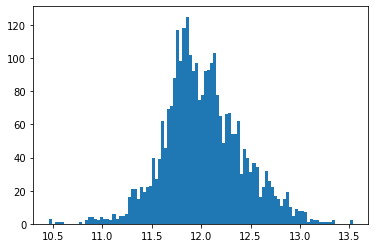

In [183]:
plt.hist(df_all_2['SalePrice'], bins=100)

# Ищем нужные фичи

## все фичи df_all_2

In [184]:
a = df_all_2.columns.to_list()

In [185]:
a.remove('SalePrice')

In [186]:
all_features = a
len(all_features)

79

In [187]:
df_all_2_obj_col = list(df_all_2.select_dtypes(include=['object'])) #все колонки с type=object
df_all_2_numeric = list(df_all_2.select_dtypes(exclude=['object'])) #все колонки с type=int64&float64

## заменяем все числовые значения на StandardScaler - df_all_2_numeric.remove('SalePrice')

In [188]:
from sklearn.model_selection import train_test_split #делить на train-выборку и test-выборку
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

df_all_2_numeric.remove('SalePrice') #все колонки с type=int64&float64 -> удаляем target

ss_scaler = StandardScaler() #категориальные не закидываем(как правило)!!!
# X_train = df_all_2[all_features] 
df_all_2[df_all_2_numeric] = ss_scaler.fit_transform(df_all_2[df_all_2_numeric]) #итого: scaled_X_tr - фичи, по которым будем учить модель на tr в X_train!

In [189]:
# df_all_2.columns

## TRAIN, X_train, Y_train

In [190]:
TRAIN = df_all_2[0:1458]

In [191]:
X_train = df_all_2[0:1458].drop('SalePrice', axis = 1)
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,YrSold,House_age
1,-0.778480,1.198058,-0.112813,0.221287,0.169987,0.26168,0.173550,-0.485334,0.784040,-0.363289,...,-0.185729,-0.223684,-0.30926,0.064271,1.020455,0.018160,-0.944441,0.897702,0.157449,-1.178100
2,0.429642,-0.862925,-0.112813,0.221287,0.169987,0.26168,0.173550,2.631459,0.893271,-0.363289,...,-0.185729,-0.223684,-0.30926,0.064271,-0.197058,0.348137,1.255092,-0.394865,-0.602948,0.192396
3,-0.554112,1.202313,-0.112813,0.221287,0.169987,0.26168,0.173550,0.250170,0.658948,-0.363289,...,-0.185729,-0.223684,-0.30926,0.064271,-0.197058,0.079442,-0.944441,0.849829,0.157449,-1.011499
4,-0.418429,1.160894,-0.112813,0.221287,0.169987,0.26168,1.849381,-0.485334,0.387679,-0.363289,...,-1.237992,-0.223684,-0.30926,0.064271,0.449846,-0.087412,-0.944441,-0.682102,-1.363345,1.386446
5,0.126800,1.261937,-0.112813,0.221287,1.385311,0.26168,0.173550,0.736114,0.758915,-0.363289,...,-0.185729,-0.223684,-0.30926,0.064271,1.530882,0.265421,1.086183,0.754083,0.157449,-0.935417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.444443,1.134807,-0.112813,0.221287,0.169987,0.26168,0.173550,-0.485334,-1.417692,-0.363289,...,-0.185729,-0.223684,-0.30926,0.064271,0.449846,0.109396,-0.944441,0.754083,-0.602948,-0.863450
1455,1.974779,-0.862925,-0.112813,0.221287,0.169987,0.26168,0.173550,-0.485334,0.821714,2.346022,...,-0.185729,-0.223684,-0.30926,0.064271,0.449846,0.518515,1.315860,0.179609,1.678244,0.127453
1456,0.241551,1.289343,-0.112813,0.221287,1.385311,0.26168,1.849381,-0.485334,0.468386,-0.363289,...,-0.185729,-0.223684,-0.30926,0.064271,1.530882,0.270603,-0.944441,1.041320,1.678244,0.999206
1457,-0.060873,-0.862925,-0.112813,0.221287,-1.045337,0.26168,0.173550,0.250170,-0.104907,3.322168,...,-0.185729,-0.223684,-0.30926,0.064271,-0.943853,0.214162,1.334160,0.562592,1.678244,0.833757


In [192]:
# X_train.to_csv('X_train - 16.11.21.csv', header=True, index=False)

In [193]:
Y_train = df_all_2['SalePrice'][0:1458]
Y_train

1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
          ...    
1454    12.072547
1455    12.254868
1456    12.493133
1457    11.864469
1458    11.901590
Name: SalePrice, Length: 1458, dtype: float64

In [194]:
# Y_train.to_csv('Y_train - 16.11.21.csv', header=True, index=False)

# GradientBoosting на TRAIN - fit на сплите

## GridSearch для GradientBoosting - fit на всём

In [195]:
# %%time 

# gradient_busting_first = GradientBoostingRegressor()

# params_gb_regressor = {'n_estimators': [10, 100, 1000], 
#                      'min_samples_split': [i for i in range(2, 5)],
#                        'max_depth': [i for i in range(3, 6)],
#                       'random_state':[0] }

# Grid_Search_gb_regressor = GridSearchCV(gradient_busting_first, 
#                                        params_gb_regressor,
#                                        scoring='neg_mean_squared_error') 
# Grid_Search_gb_regressor.fit(X_train, Y_train) # закидывем весь TRAIN, НЕ что в train_test_split

# G_S_1_best_params = Grid_Search_gb_regressor.best_params_
# G_S_1_best_params

In [196]:
# %%time 

# gradient_busting_first = GradientBoostingRegressor()

# params_gb_regressor = {'n_estimators': [i for i in range (100, 120)], 
#                      'min_samples_split': [2],
#                        'max_depth': [4],
#                       'random_state':[0] }

# Grid_Search_gb_regressor = GridSearchCV(gradient_busting_first, 
#                                        params_gb_regressor,
#                                        scoring='neg_mean_squared_error') 
# Grid_Search_gb_regressor.fit(X_train, Y_train) # закидывем весь TRAIN, НЕ что в train_test_split

# G_S_1_best_params = Grid_Search_gb_regressor.best_params_
# G_S_1_best_params

## split TRAIN на -train и -valid

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error # импортируем mse
from sklearn.metrics import mean_absolute_error # импортируем MAE
from sklearn.metrics import mean_absolute_percentage_error # импортируем MAPE
from sklearn.metrics import r2_score # импортируем R2

In [198]:
x_TR_train, x_TR_valid, y_TR_train, y_TR_valid = train_test_split(X_train,
                                                      Y_train.to_numpy(), 
                                                      random_state=900, 
                                                      train_size=0.5) #поиграть с долей
x_TR_train.shape, x_TR_valid.shape, y_TR_train.shape, y_TR_valid.shape

((729, 79), (729, 79), (729,), (729,))

In [199]:
# x_TR_train.to_csv('x_TR_train - 16.11.21.csv', header=True, index=False)
# x_TR_valid.to_csv('x_TR_valid - 16.11.21.csv', header=True, index=False)
# y_TR_train.to_csv('y_TR_train - 16.11.21.csv', header=True, index=False)
# y_TR_valid.to_csv('y_TR_valid - 16.11.21.csv', header=True, index=False)

## gradient_busting_1 с гиперпараметрами G_S_1_best_params

In [200]:
gradient_busting_1 = GradientBoostingRegressor(max_depth=4, 
                                              min_samples_split=2, 
                                              n_estimators=110, 
                                              random_state=0)
gradient_busting_1.fit(x_TR_train, y_TR_train)
gradient_busting_1_predicted = gradient_busting_1.predict(x_TR_valid)
mse_gb_train_1 = mean_squared_error(y_TR_valid, gradient_busting_1_predicted)

print('train acc:', mean_squared_error(np.expm1(gradient_busting_1.predict(x_TR_train)), np.expm1(y_TR_train)))
print('test acc:', mean_squared_error(np.expm1(gradient_busting_1.predict(x_TR_valid)), np.expm1(y_TR_valid)))
mse_gb_train_1


train acc: 53717051.777867906
test acc: 722688925.8314747


0.018222581967472805

# RidgeCV на TRAIN - fit на сплите

In [201]:
from sklearn.linear_model import RidgeCV, LassoCV

In [202]:
ridge = RidgeCV(alphas=np.arange(0.1, 3, 0.1))
ridge.fit(x_TR_train, y_TR_train)
ridge_predicted = ridge.predict(x_TR_valid)

print('train acc:', mean_squared_error(np.expm1(ridge.predict(x_TR_train)), np.expm1(y_TR_train)))
print('test acc:', mean_squared_error(np.expm1(ridge.predict(x_TR_valid)), np.expm1(y_TR_valid)))



train acc: 420577794.3075075
test acc: 487194380.908977


#  LassoCV на TRAIN - fit на сплите

In [203]:
lasso = LassoCV(alphas=np.arange(0.0001, 1, 0.1))
lasso.fit(x_TR_train, y_TR_train)
lasso_predicted = lasso.predict(x_TR_valid)

print('train acc:', mean_squared_error(np.expm1(lasso.predict(x_TR_train)), np.expm1(y_TR_train)))
print('test acc:', mean_squared_error(np.expm1(lasso.predict(x_TR_valid)), np.expm1(y_TR_valid)))



train acc: 420106546.77574277
test acc: 492315567.828409


# blending models

In [204]:
def blending_models(x, model_1, model_2, a=0.9):
    return a * model_1.predict(x) + (1-a) * model_2.predict(x)

In [205]:
print('train mse:', mean_squared_error(np.expm1(blending_models(x_TR_train, ridge, lasso)), np.expm1(y_TR_train))) 
print('test mse:', mean_squared_error(np.expm1(blending_models(x_TR_valid, ridge, lasso)), np.expm1(y_TR_valid)))     

train mse: 420502774.77484727
test mse: 487669277.60204774


In [206]:
print('train mse:', mean_squared_error(np.expm1(blending_models(x_TR_train, ridge, gradient_busting_1)), np.expm1(y_TR_train))) 
print('test mse:', mean_squared_error(np.expm1(blending_models(x_TR_valid, ridge, gradient_busting_1)), np.expm1(y_TR_valid)))  

train mse: 358147863.8741089
test mse: 483863165.32842934


# TEST

In [207]:
df_all_2

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,YrSold,House_age
1,-0.778480,1.198058,-0.112813,0.221287,0.169987,0.261680,0.173550,-0.485334,0.784040,-0.363289,...,12.247699,-0.223684,-0.30926,0.064271,1.020455,0.018160,-0.944441,0.897702,0.157449,-1.178100
2,0.429642,-0.862925,-0.112813,0.221287,0.169987,0.261680,0.173550,2.631459,0.893271,-0.363289,...,12.109016,-0.223684,-0.30926,0.064271,-0.197058,0.348137,1.255092,-0.394865,-0.602948,0.192396
3,-0.554112,1.202313,-0.112813,0.221287,0.169987,0.261680,0.173550,0.250170,0.658948,-0.363289,...,12.317171,-0.223684,-0.30926,0.064271,-0.197058,0.079442,-0.944441,0.849829,0.157449,-1.011499
4,-0.418429,1.160894,-0.112813,0.221287,0.169987,0.261680,1.849381,-0.485334,0.387679,-0.363289,...,11.849405,-0.223684,-0.30926,0.064271,0.449846,-0.087412,-0.944441,-0.682102,-1.363345,1.386446
5,0.126800,1.261937,-0.112813,0.221287,1.385311,0.261680,0.173550,0.736114,0.758915,-0.363289,...,12.429220,-0.223684,-0.30926,0.064271,1.530882,0.265421,1.086183,0.754083,0.157449,-0.935417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,-2.177199,1.061703,-0.112813,0.221287,0.169987,-3.172907,0.173550,-0.485334,-1.417692,-0.363289,...,11.280868,-0.223684,-0.30926,0.064271,-0.943853,-0.363874,-0.944441,-0.682102,-1.363345,0.370136
2914,-2.177199,1.061703,-0.112813,0.221287,0.169987,0.844607,0.173550,-0.485334,0.439187,-0.363289,...,11.268887,-0.223684,-0.30926,0.064271,-0.197058,-0.363874,-0.944441,-0.682102,-1.363345,0.370136
2915,0.334473,-0.862925,-0.112813,0.221287,1.385311,0.261680,0.173550,-0.485334,0.968495,-0.363289,...,11.984306,-0.223684,-0.30926,0.064271,0.449846,0.322143,1.433692,0.562592,-1.363345,0.622030
2916,-0.389419,-0.862925,-0.112813,0.221287,0.169987,0.261680,0.173550,0.736114,0.536389,-0.363289,...,11.713860,-0.223684,-0.30926,0.064271,-0.197058,0.072019,0.751170,0.371101,-1.363345,-0.445950


In [208]:
TEST = df_all_2[1458:].drop('SalePrice', axis = 1)

In [209]:
TEST.to_csv('TEST - 16.11.21.csv', header=True, index=False)

# RidgeCV и LassoCV на TEST - fit на всём

In [ ]:
ridge_for_TEST = RidgeCV(alphas=np.arange(0.1, 3, 0.1))
ridge_for_TEST.fit(X_train, Y_train)
ridge_for_TEST_predicted = np.expm1(ridge_for_TEST.predict(TEST))

In [ ]:
lasso_for_TEST = LassoCV(alphas=np.arange(0.0001, 1, 0.1))
lasso_for_TEST.fit(X_train, Y_train)
lasso_for_TEST_predicted = np.expm1(lasso_for_TEST.predict(TEST))

In [ ]:
# def blending_models(x, model_1, model_2, a=0.9):   напоминаю, что было в ф-ции 'blending_models'
#     return a * ridge_for_TEST_predicted + (1-a) * model_2.predict(x)

## ! result

In [ ]:
result = 0.9 * ridge_for_TEST_predicted + 0.1 * lasso_for_TEST_predicted
result

In [ ]:
# print('result:', blending_models(TEST, ridge, lasso))

In [ ]:
d = {'Id': range(1461, 2920), 'SalePrice': result}
result_df = pd.DataFrame(d)
result_df.index = result_df.index + 1
result_df

In [696]:
result_df.to_csv('submission.csv', header=True, index=False)

In [697]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "17.11.2021"

100%|██████████████████████████████████████| 33.7k/33.7k [00:03<00:00, 10.6kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

# permutation_importance

In [698]:
from sklearn.inspection import permutation_importance
perm_imp = permutation_importance(ridge.fit(x_TR_train, y_TR_train), 
                                  x_TR_train, y_TR_train, 
                                  n_repeats=10, random_state=0)

In [708]:
perm_imp.importances_mean

array([ 6.74068075e-04,  8.54474829e-03,  3.72985448e-06,  1.65444267e-05,
        2.92190424e-04,  5.43065801e-05,  1.19872058e-04,  3.65072601e-03,
        6.13530473e-03,  2.15867907e-03,  1.60056274e-05,  3.82343686e-04,
        5.06674371e-03,  5.66106751e-05,  6.02393947e-04,  3.48226898e-04,
        2.26664683e-03,  2.76856014e-03,  2.87772608e-06,  3.11868484e-04,
        1.33283383e-04,  8.92632031e-06,  6.39263445e-04,  6.01685586e-03,
        2.57439914e-03,  1.21299430e-04,  1.10312648e-04,  6.21924733e-04,
        2.29125298e-03,  1.82682049e-03,  3.70962536e-03,  4.28443943e-03,
        4.36932198e-03,  2.52964980e-03,  8.82311742e-04,  4.01153602e-03,
        8.33873492e-04,  2.31692299e-04,  2.88250840e-01,  5.36502033e-03,
        4.84434644e-05,  3.61699333e-03,  1.42382518e-03,  7.58816991e-04,
        2.85514901e-03,  2.72164290e-03,  1.43604368e-04, -8.70488787e-07,
        1.77714490e-02,  6.47271069e-04,  4.04742685e-05,  2.13263499e-04,
        1.49890443e-03,  

In [709]:
perm_imp.importances_mean.mean()

0.006804518418843228

In [701]:
perm_imp.importances_std

array([3.19260257e-04, 1.01163041e-03, 7.89003712e-05, 4.62282657e-05,
       1.59902385e-04, 1.05331732e-04, 8.72149849e-05, 7.22134895e-04,
       1.17227192e-03, 6.25978597e-04, 5.51353227e-05, 2.11149649e-04,
       5.22833256e-04, 2.25309743e-04, 2.02593650e-04, 2.19074699e-04,
       4.30466634e-04, 5.74098498e-04, 4.41488511e-05, 2.03596290e-04,
       1.32453491e-04, 5.31092577e-05, 1.83965217e-04, 6.17639035e-04,
       3.20261400e-04, 9.41434925e-05, 1.05629353e-04, 3.31253306e-04,
       5.90422559e-04, 3.89253444e-04, 6.19750657e-04, 9.05704797e-04,
       6.81066342e-04, 6.72258311e-04, 3.22771364e-04, 7.26048902e-04,
       3.68649931e-04, 1.61222505e-04, 1.05756520e-02, 1.08625494e-03,
       7.40459128e-05, 7.38781464e-04, 6.65159607e-04, 4.64052013e-04,
       4.46642814e-04, 4.72375548e-04, 1.48468663e-04, 7.06099224e-06,
       2.07260712e-03, 2.23150773e-04, 5.31434018e-05, 1.88011782e-04,
       3.87818061e-04, 5.80277396e-06, 8.20090771e-04, 8.90819241e-05,
      

In [710]:
# from ads.explanations.explainer import ADSExplainer

# explainer = ADSExplainer(y_TR_train, ridge, training_data=x_TR_train)
# from ads.explanations.mlx_global_explainer import MLXGlobalExplainer

# global_explainer = explainer.global_explanation(
#                      provider=MLXGlobalExplainer())
# global_explainer.feature_importance_summary()
# importances = global_explainer.compute_feature_importance()
# importances.show_in_notebook()


ModuleNotFoundError: No module named 'ads'

# Кластеризуем? (...после п.8 и повторим до 15)

In [735]:
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [736]:
# напоминаю
# df_all_2_obj_col = list(df_all_2.select_dtypes(include=['object'])) #все колонки с type=object
# df_all_2_numeric = list(df_all_2.select_dtypes(exclude=['object'])) #все колонки с type=int64&float64

In [737]:
df_for_dimension = df_all_2[df_all_2_numeric]

## понижаем размерность

### через PCA

In [738]:
pca = PCA(n_components=5) # n_components - размерность пространства (до скольких уменьшим кол-во фичей). Но лучше начинать с 5-10.
X_pca = pca.fit_transform(df_for_dimension)

In [739]:
len(np.unique(X_pca))

14585

### через TSNE

In [740]:
tsne = TSNE(n_components=2, perplexity=20)
X_tsne = tsne.fit_transform(df_for_dimension)
X_tsne

len(np.unique(X_tsne))

5833

### через UMAP

In [741]:
umap = UMAP(n_components=2, n_neighbors=5)
X_umap = umap.fit_transform(df_for_dimension)
X_umap


len(np.unique(X_umap))

5831

## кластеризация x_PCA

In [756]:
from sklearn.metrics import rand_score, jaccard_score, adjusted_mutual_info_score, silhouette_score
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN

In [757]:
km_PCA = KMeans(5)
ap_PCA = AffinityPropagation(max_iter=1000)
dbs_PCA = DBSCAN(eps=12, min_samples=5)

In [758]:
km_PCA.fit(X_pca)

KMeans(n_clusters=5)

In [759]:
ap_PCA.fit(X_pca)

AffinityPropagation(max_iter=1000)

In [760]:
dbs_PCA.fit(X_pca)

DBSCAN(eps=12)

In [761]:
dbs_PCA.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [763]:
np.unique(dbs_PCA.labels_)

array([0])

## silhouette_score

In [752]:
from sklearn import metrics
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [753]:
silhouette_score(X_pca, dbs.labels_)

NameError: name 'dbs' is not defined

In [ ]:
silhouette_score(X_tsne, dbs.labels_)

In [ ]:
silhouette_score(X_umap, dbs.labels_)